In [40]:
import numpy as np
import control
from control.matlab import *
import matplotlib.pyplot as plt

In [41]:
num = [1.076]
den = [1.027, 3.141, 1.939]
G = tf(num,den)

In [42]:
G

TransferFunction(array([1.076]), array([1.027, 3.141, 1.939]))

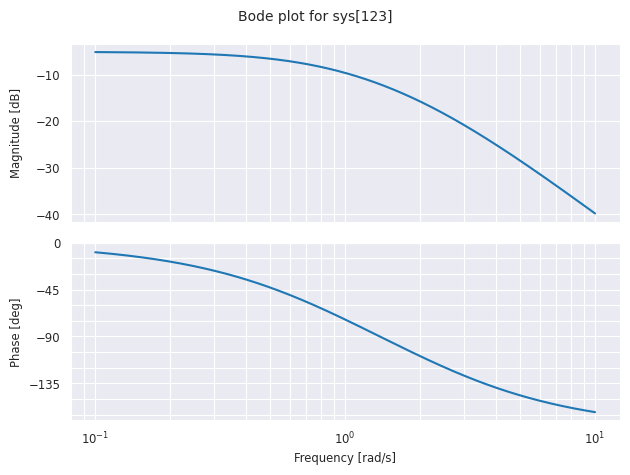

In [43]:

bode(G)
plt.show()

In [44]:
ts = 1e-2
T = 900
t = np.arange(0, T, ts)
u = np.random.normal(0, 1000, t.shape)

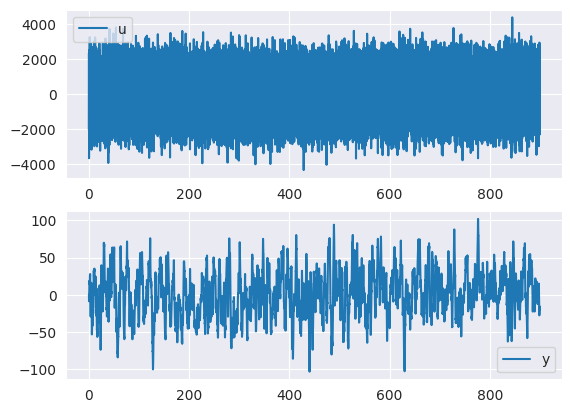

In [45]:
y, t, _ = lsim(G, u, t)
plt.subplot(211)
plt.plot(t, u, label="u")
plt.legend()
plt.subplot(212)
plt.plot(t, y, label="y")
plt.legend()

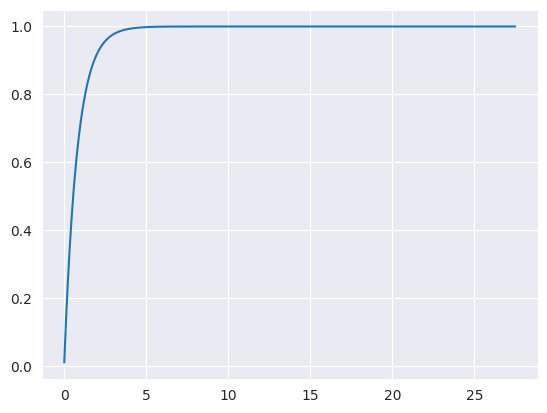

In [46]:
# VRFT
s = tf('s')
tau = 5 # s
M = 1/(1 + (tau/(2*np.pi))*s)
M = M*(1 + 1e-2*(tau/(2*np.pi))*s) # add a high freq zero for inversion
T_cl = tau + 0.5
t_cl = np.arange(0, 5*T_cl, ts)
y_d, _ = step(M, t_cl)
plt.plot(t_cl, y_d)

In [47]:
# vrft
r_v = lsim(M**(-1), y, t)[0]
e_v = r_v - y

In [48]:

B=[tf([1],[1],dt=ts),
tf(ts*np.array([1, 1]),2*np.array([1, -1]),dt=ts),
tf(np.array([2, -2]),ts*np.array([3, -1]),dt =ts)]

In [49]:
import cvxpy as cp
theta = cp.Variable(3)
#u_theta = theta[0]*lsim(B[0], e_v, t)[0] + theta[1]*lsim(B[1], e_v, t)[0] 
u_theta = theta[0]*lsim(B[0], e_v, t)[0] + theta[1]*lsim(B[1], e_v, t)[0] + theta[2]*lsim(B[2], e_v, t)[0]

In [50]:
cost = cp.sum_squares(u - u_theta)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()
theta_sol = theta.value
print(theta_sol)

[0.28739796 0.74539968 0.38105228]


In [51]:
C = theta_sol[0]*B[0] + theta_sol[1]*B[1] + theta_sol[2]*B[2]
#C = theta_sol[0]*B[0] + theta_sol[1]*B[1] 

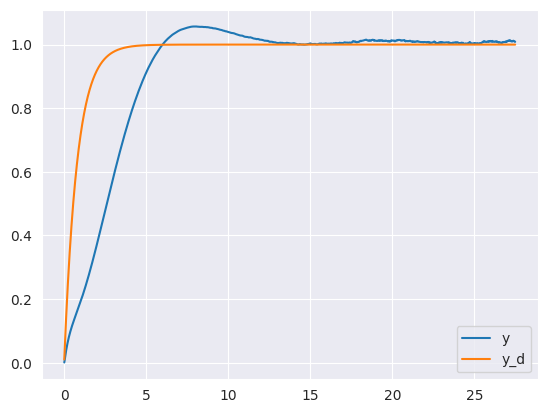

In [52]:
G = c2d(G, ts, 'tustin')
F = C*G/(1 + C*G)
y_cl, _ = step(F, t_cl)
plt.plot(t_cl, y_cl, label='y')
plt.plot(t_cl, y_d, label='y_d')
plt.legend()
plt.show()